Objetivo:Classificar se uma pessoa comprou ou não comprou um produto com base no sálario ou na idade

C:\Users\Victor\Desktop\Codigos_IABD2024\Aula 07

In [2]:
#importa biblioteca pandas
import pandas as pd

In [8]:
df = pd.read_csv('C:/Users/Victor/Desktop/Codigos_IABD2024/Aula 07/Base_Dados/Social_Network_Ads.csv',sep =',') #Importa a base de dados

In [ ]:
df.head() #Exibe as primeiras linhas do Dataframe

In [12]:
colunas = {'User ID:': 'Usuario',
           'Gender': 'Genero',
           'Age': 'Idade', 'EstimatedSalary': 'Salario estimado',
           'Puchased': 'Comprou'}

In [13]:
df.rename(columns=colunas,inplace=True) # Renomeia as colunas

In [14]:
df.head()

,User ID,Genero,Idade,Salario estimado,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Importando as bibiotecas necesarias para realizar a análise de dados

In [42]:
import numpy as np #importa a bibioteca numpy
import matplotlib.pyplot as plt 
from sklearn.svm import SVC # importa o algoritmo de svm
from sklearn.preprocessing import StandardScaler #bibliteca para normalizar os dados
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score #biblioteca para gerar as metricas
from matplotlib.colors import ListedColormap #Biblioteca para alterar a cor dos gráficos

Selecionando as colunas do dataset

In [17]:
x = df.iloc[:,[2,3]].values #x é a entrada onde pega a idade e a renda dos clientes
y =df.iloc[:, -1].values # y é a saida

In [ ]:
x #exibe os valores

In [ ]:
y #exibe os valores

Dividindo os dados em treino e teste

In [22]:
from sklearn.model_selection import train_test_split #Biblioteca para dividir os dados em treino e teste
X_treino,X_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,
                                                       random_state=3)

Nornmalizando os dados com StandScaller

In [23]:
sc = StandardScaler() #biblioteca para normalizar os dados

In [24]:
X_treino = sc.fit_transform(X_treino) # realiza a tranformção dos dados
X_teste = sc.fit_transform(X_teste) # realiza a transormação dos dados

In [48]:
#Cria o algoritimo de machine learning e treinando o algoritmo SVM
algoritmo = SVC(kernel='linear',random_state=3) #Kernel é a euqação do modelo svm

In [49]:
#Treinando o modelo
algoritmo.fit(X_treino,y_treino) #treina o modelo com os dados de entrada e saida

SVC(kernel='linear', random_state=3)

In [50]:
#Gerando previsão dos resultados
y_prev = algoritmo.predict(X_teste) #Realiza a predição dos valores

In [ ]:
X_teste

In [31]:
x_teste_padrao = sc.inverse_transform(X_teste)

In [ ]:
x_teste_padrao

Gerando a matriz de confusão

In [36]:
cm = confusion_matrix(y_teste, y_prev)
print(cm)

[[72  6]
 [13 29]]


Gerando a matriz de confusão de forma gráfica

In [37]:
import seaborn as sns #importa a biblioteca seaborn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User ID           400 non-null    int64 
 1   Genero            400 non-null    object
 2   Idade             400 non-null    int64 
 3   Salario estimado  400 non-null    int64 
 4   Purchased         400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


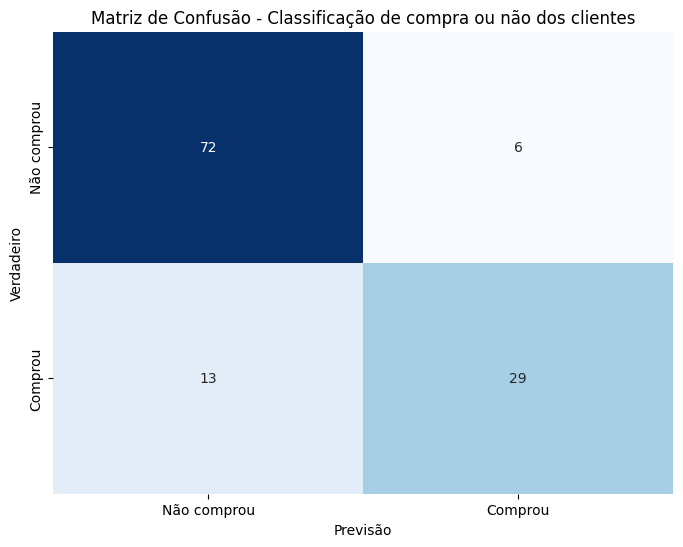

In [51]:
plt.figure(figsize=(8,6))
print(df.info())
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Não comprou','Comprou'],yticklabels=['Não comprou','Comprou'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação de compra ou não dos clientes')
plt.show()

In [40]:
#acuracia = VP + VN / Total
acc =accuracy_score(y_teste,y_prev)
acc

0.8416666666666667

In [43]:
# precisão = vp / (VP + FN)
prec = precision_score(y_teste,y_prev)
prec

0.8285714285714286

#f1_score
#f1_socre é a métrica mais completa para avaliar um modelo de machine learning pois leva em consideração além dos verdadeiros positivose verdadeiros negativos, os falson positivos e falso negativo

In [44]:
f1 = f1_score(y_teste,y_prev)
f1

0.7532467532467533

Gerando visualização dos dados de treinamento

C:\Users\dsadm\AppData\Local\Temp\ipykernel_11236\1855831098.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


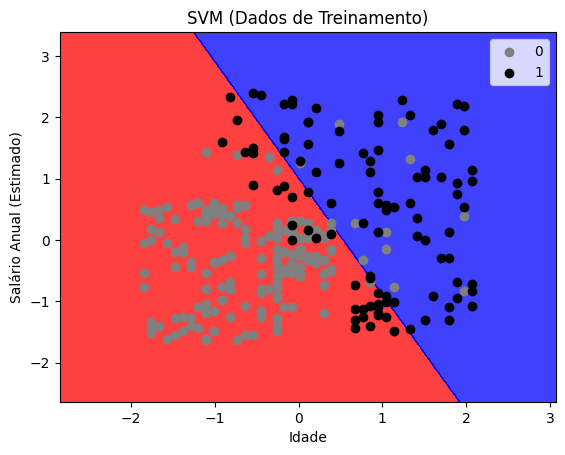

In [53]:
_X, _y = X_treino, y_treino
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('gray', 'black'))(i), label = j)
plt.title('SVM (Dados de Treinamento)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

Gerando visualização dos dados de teste

C:\Users\dsadm\AppData\Local\Temp\ipykernel_11236\785051974.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


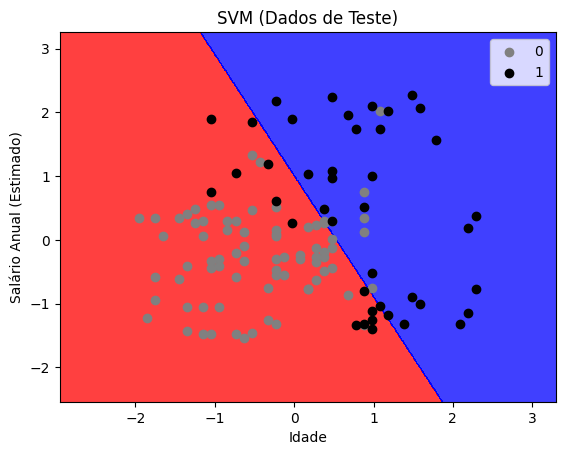

In [54]:
# Visualizando os resultados dos dados de teste:
_X, _y = X_teste,y_teste
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('grey', 'black'))(i), label = j)
plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()